In [9]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

In [10]:
model = ResNet50(weights='imagenet')

In [11]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [28]:
def preprocess_image(img_path):
    #loading images with size 224x224
    img = image.load_img(img_path, target_size=(224, 224))
    # converting images into array
    img = image.img_to_array(img)
    # reshaping
    img = np.expand_dims(img, axis=0)
    # preprocessing the image
    img = preprocess_input(img)
    img = img/255
    return img
img = preprocess_image(r"D:\AI\KaizanAbuDhabi\abudhabicodes\kaizen_training\kaizen\cat.3.jpg")
print('Input image shape:', img.shape)

Input image shape: (1, 224, 224, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


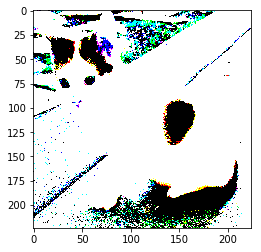

In [15]:
import matplotlib.pyplot as plt
plt.imshow(img.reshape(224,224,3))
plt.show()

In [16]:
preds = model.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02124075', 'Egyptian_cat', 0.17055015), ('n02123597', 'Siamese_cat', 0.122457266), ('n03958227', 'plastic_bag', 0.11745568)]


# Transfer Learning

In [17]:
model.layers[-1].get_config()

{'name': 'fc1000',
 'trainable': True,
 'units': 1000,
 'activation': 'softmax',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'VarianceScaling',
  'config': {'scale': 1.0,
   'mode': 'fan_avg',
   'distribution': 'uniform',
   'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [18]:
# load the RESNET50 without the last output layer
model = ResNet50(weights='imagenet', include_top=False)
model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [19]:
img = preprocess_image(r"C:\Users\anshu\Documents\Transfer-Learning-in-keras---custom-data\data\data\horses\horse-24.jpg")
features = model.predict(img)
features.shape

(1, 7, 7, 2048)

In [20]:
from keras import models,layers
image_input = layers.Input(shape=(224,224,3))

In [21]:
model = ResNet50(input_tensor=image_input, include_top=False,weights='imagenet')
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [22]:
# extracting the avg_pool layer as last layer
last_layer = model.output
# flatten it
x= layers.Flatten(name='flatten')(last_layer)
# add the output layer with 3 neurons
out = layers.Dense(3, activation='softmax', name='output_layer')(x)
# creating model for the given layers
custom_resnet_model = models.Model(inputs=image_input,outputs= out)
#check the summary
custom_resnet_model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [23]:
for layer in custom_resnet_model.layers[:-1]:
    layer.trainable = False

In [24]:
custom_resnet_model.layers[-1].trainable

True

In [25]:
custom_resnet_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [26]:
custom_resnet_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [30]:
trainimg = []
trainlb = []
folder = r"D:\AI\KaizanAbuDhabi\dubaicodes\kaizen_training\data"
import os
subfolders = os.listdir(folder)
for subfol in subfolders:
    files = os.listdir(folder+"\\"+subfol)
    print("loading images for ",subfol)
    for filename in files:
        filepath = folder + "\\" + subfol + "\\" + filename
        img = preprocess_image(filepath)
        trainimg.append(img)
        trainlb.append(subfol)

loading images for  dogs
loading images for  horses
loading images for  Humans


In [32]:
trainimg = np.array(trainimg)

In [34]:
print(trainimg.shape)
trainimg=np.rollaxis(trainimg,1,0)
print(trainimg.shape)
trainimg=trainimg[0]
print(trainimg.shape)

(606, 1, 224, 224, 3)
(1, 606, 224, 224, 3)
(606, 224, 224, 3)


In [38]:
trainlb = np.array(trainlb).reshape(-1,1)
from sklearn.preprocessing import OneHotEncoder
trainlb = OneHotEncoder().fit_transform(trainlb).toarray()
trainlb.shape

(606, 3)

In [41]:
from sklearn.utils import shuffle
trainimg,trainlb = shuffle(trainimg,trainlb)

In [42]:
custom_resnet_model.fit(trainimg, trainlb, batch_size=32,epochs=12, validation_split=0.2,verbose=True          )

Train on 484 samples, validate on 122 samples
Epoch 1/12
484/484 [==============================] - 10s 21ms/step - loss: 0.5258 - acc: 0.9112 - val_loss: 5.7304 - val_acc: 0.2623
Epoch 2/12
484/484 [==============================] - 5s 10ms/step - loss: 0.1820 - acc: 0.9814 - val_loss: 5.4537 - val_acc: 0.4426
Epoch 3/12
484/484 [==============================] - 5s 10ms/step - loss: 0.0559 - acc: 0.9959 - val_loss: 5.6682 - val_acc: 0.2869
Epoch 4/12
484/484 [==============================] - 5s 10ms/step - loss: 0.0021 - acc: 0.9979 - val_loss: 5.9045 - val_acc: 0.2623
Epoch 5/12
484/484 [==============================] - 5s 10ms/step - loss: 0.0772 - acc: 0.9938 - val_loss: 6.5104 - val_acc: 0.4344
Epoch 6/12
484/484 [==============================] - 5s 10ms/step - loss: 0.0349 - acc: 0.9938 - val_loss: 7.1947 - val_acc: 0.4344
Epoch 7/12
484/484 [==============================] - 5s 10ms/step - loss: 0.0831 - acc: 0.9938 - val_loss: 6.6522 - val_acc: 0.4344
Epoch 8/12
484/484 [==